# Activation statistics and weight initialization
This notebook follows [this video lesson](https://www.youtube.com/watch?v=gYpoJMlgyXA&t=38m49s) by Andrej Karpathy, who does everything in `Numpy`.


We investigate the statistics of the activations in a multi-layer perceptron in relation to the distribution of the weights in the model.


Consider an MLP with zero biases,
$$h_{i+1} = f(W_{i+1}h_i)\,,\quad i=0, \dots L-1\,,$$
where $f$ is a non-linearity such as sigmoid, tanh, or relu.  
For simplicity we take all layers to have equal width $H$, i.e.
$$h_i\in\mathbb R^H\,,\qquad i=0, \dots, L\,,$$

The weights $W_i\in\mathbb R^{H\times H}$, $i=1, \dots, L$, are i.i.d. Gaussian with zero mean and standard deviation $\epsilon$.
We draw $N$ input samples $h_0$ from the unit normal distribution and compute the distribution of the activations $h_i$, $i=1,\dots, L$ to the hidden and output layers.

---
tags: exploration, statistics, weights initialization, activations, Andrej Karpathy

# Imports

In [1]:
from tqdm import tqdm

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Generate data and compute means and standard deviations in each layer

100%|██████████| 5/5 [00:00<00:00, 198.01it/s]


Layer  0: mean =  -0.00029864, std =   1.00025453
Layer  1: mean =  -0.00026686, std =   0.62863855
Layer  2: mean =  -0.00054785, std =   0.48621186
Layer  3: mean =   0.00031690, std =   0.40926006
Layer  4: mean =   0.00189075, std =   0.36260211
Layer  5: mean =   0.00020093, std =   0.32582027


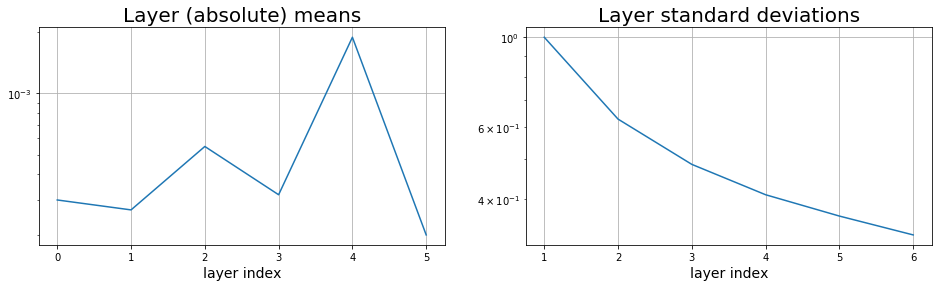

In [2]:
L = 5 # length/depth of net: number of (hidden?) layers
H = 200 # height/width of net: dimension of hidden inputs
N = 1_000 # number of samples

scale = 1/np.sqrt(H)


D = np.random.randn(N, H)
layer_sizes = [H]+[H]*L
non_linearities = ['tanh']*L
activ = {'relu': lambda x: np.maximum(0, x), 'tanh': np.tanh}

# hidden_layer_sizes

Hs = {}
Hs[0] = D

for i in tqdm(range(1, L+1)):
    X = Hs[i-1]
    fan_in = X.shape[1]
    fan_out = layer_sizes[i]
    W = scale * np.random.randn(fan_in, fan_out) 
    Hs[i] = activ['tanh'](np.dot(X, W))

# print(f"Input layer: mean = {D.mean():>12.8f}, std = {D.std():>12.8f} ")
layer_means = [H.mean() for H in Hs.values()]
layer_stds = [H.std() for H in Hs.values()]

for i, (mu, sigma) in enumerate(zip(layer_means, layer_stds)):
    print(f"Layer {i:>2}: mean = {mu:>12.8f}, std = {sigma:>12.8f}")
    

## Plot means and standard deviations in each layer

fig, axs = plt.subplots(1, 2, figsize=(16, 4))
axs = axs.flatten()

ax = axs[0]
ax.plot(list(Hs.keys()), np.abs(layer_means));
ax.set_yscale('log')
ax.set_title("Layer (absolute) means", fontsize=20);
ax.set_xticks(list(Hs.keys()))
# ax.set_xticklabels([i+1 for i in Hs.keys()])
ax.set_xlabel('layer index', fontsize=14)
ax.grid();

ax = axs[1]
ax.plot(list(Hs.keys()), layer_stds);
ax.set_yscale('log')
ax.set_title("Layer standard deviations", fontsize=20);
ax.set_xticks(list(Hs.keys()))
ax.set_xticklabels([i+1 for i in Hs.keys()])
ax.set_xlabel('layer index', fontsize=14)
ax.grid();

## Histograms

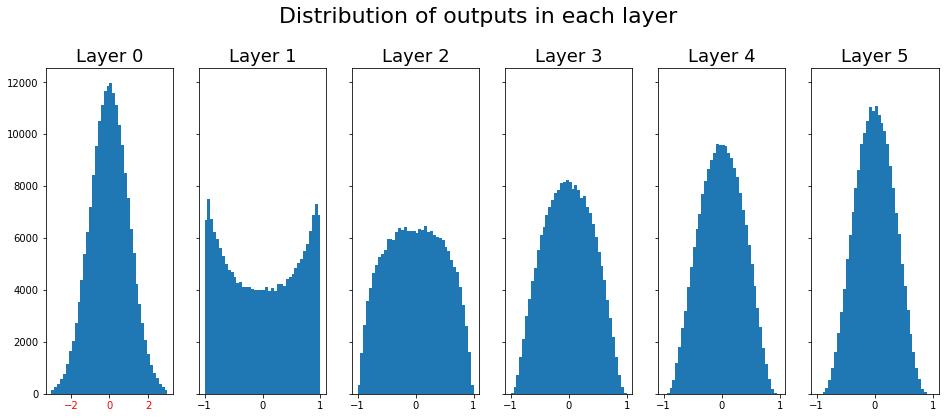

In [3]:
fig, axs = plt.subplots(1, L+1, sharey=True, figsize=(16, 6))

for i, H in Hs.items():
    bins = np.linspace(-3, 3, 41) if i == 0 else np.linspace(-1, 1, 41)

    ax = axs[i]
    if i == 0:
        ax.tick_params(axis='x', labelcolor='red')

    ax.hist(H.flatten(), bins)
    ax.set_title(f"Layer {i}", fontsize=18)
    

fig.suptitle("Distribution of outputs in each layer", fontsize=22, y=1.02);
